<a href="https://colab.research.google.com/github/kxrrym03/Exports-Data-Analysis/blob/main/Exports1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Export.csv to Export.csv


In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv("Export.csv")
print(data.shape)
data.head()

(45321, 13)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.85,21099.0,21500.00,684.85
1,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,t,1000.16,17340.0,18000.00,1660.16
2,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,t,814.88,8353.0,17333.33,9795.21
3,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,t,3.67,8500.0,18234.12,9737.79
4,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,t,112.30,9456.0,17855.82,8512.12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45321 entries, 0 to 45320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      45321 non-null  object 
 1   Domain           45321 non-null  object 
 2   Area Code (M49)  45321 non-null  int64  
 3   Area             45321 non-null  object 
 4   Element Code     45321 non-null  int64  
 5   Item Code (CPC)  45321 non-null  int64  
 6   Item             45321 non-null  object 
 7   Year             45321 non-null  int64  
 8   Unit             45321 non-null  object 
 9   Import           45321 non-null  float64
 10  Export           45321 non-null  float64
 11  Production       45321 non-null  float64
 12  Consumption      45321 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.5+ MB


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year,Import,Export,Production,Consumption
count,45321.000000,45321.0,45321.000000,45321.000000,4.532100e+04,4.532100e+04,4.532100e+04,4.532100e+04
mean,422.784824,5610.0,1611.224333,2009.062267,2.979475e+03,3.304097e+03,3.088251e+04,3.055789e+04
std,252.530226,0.0,128.138020,8.784068,2.463151e+04,3.111707e+04,4.981218e+05,4.939798e+05
min,4.000000,5610.0,1231.000000,1993.000000,0.000000e+00,0.000000e+00,0.000000e+00,-5.009568e+04
25%,203.000000,5610.0,1652.000000,2002.000000,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,410.000000,5610.0,1654.000000,2009.000000,5.090000e+01,1.000000e+00,0.000000e+00,8.223000e+01
75%,642.000000,5610.0,1656.000000,2017.000000,5.396500e+02,7.480000e+01,0.000000e+00,1.113050e+03
max,894.000000,5610.0,1658.000000,2023.000000,1.334022e+06,1.220169e+06,1.734695e+07,1.732090e+07


In [ ]:
df_encoded = data.sample(n=5000, random_state=42).copy()
label_encoders = {}

# Encode the target variable
le_target = LabelEncoder()
df_encoded['Area'] = le_target.fit_transform(df_encoded['Area'])

# Encode categorical features
categorical_cols = ['Domain Code', 'Area Code (M49)', 'Item Code (CPC)', 'Item']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['Domain', 'Unit'])
y = df_encoded['Area']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid Search for best SVM polynomial parameters
param_grid = {
    'C': [1],
    'degree': [2],
    'gamma': ['scale'],
    'kernel': ['poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
svm_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(
    y_test,
    y_pred,
    labels=np.unique(y_pred),
    target_names=le_target.inverse_transform(np.unique(y_pred)))

# Print results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

Confusion Matrix:
 [[0 2 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]

Classification Report:
                                                       precision    recall  f1-score   support

                                             Albania       0.21      0.33      0.26         9
                                             Algeria       0.00      0.00      0.00         5
                                           Argentina       0.00      0.00      0.00         7
                                             Armenia       0.00      0.00      0.00         5
                                           Australia       0.25      0.11      0.15         9
                                             Austria       0.50      0.33      0.40         6
                                             Bahamas       0.00      0.00      0.00         3
       

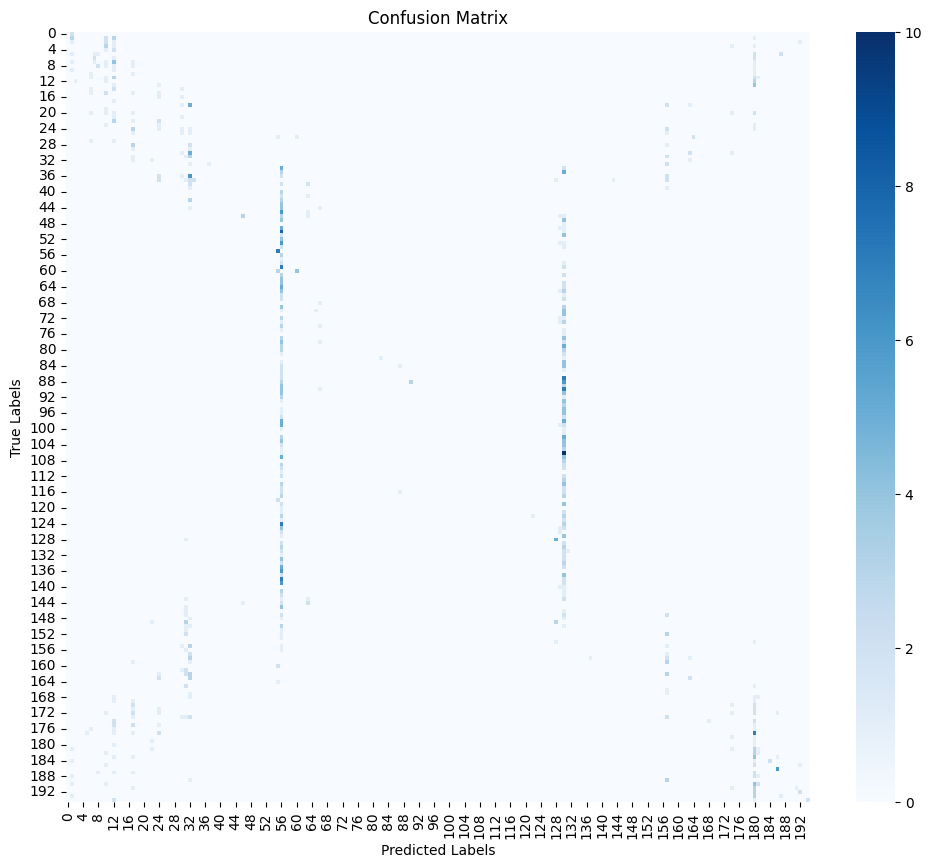

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, cmap='Blues', annot=False, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()